# Periodic Potential

Finally we want to have a look at a system which is contains a periodic potential. This is an example, which is relevant for electrons propagating in a perdiodic lattice. In a realistic case, the potential would be formed by a periodic replication of Coulomb potentials at the position of the ions. For simplicity we just introduce a sine function for the potential. The result of this calculation resembles to be a band structure as we would observe it in solids for example. 

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

Our periodic potential shall be finite in size and we will simulate that with the square of a cosine function. This time, we will not look at realistic length and energy scales, but just take a model function.

Our potential will be like that 

![Periodic Potential](periodic_potential.png)

where we chose the height and period of the cosine function.

## Definition of the problem

Before we start, we need to define some quantities:

* we will study this time a domain of $L=4\pi$
* we will use N=3001 positions along $x$
* our potential will be described by $V(x)=A\cos^2(b\cdot x)$
* we will choose $A=30$, $b=3$

In [2]:
L = 4*np.pi
N = 3001
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

### Potential energy

We first define the diagonal potential energy matrix.

In [3]:
# periodic potential for band structure
U_vec =30*np.cos(3*x)**2

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

### Kinetic energy

Next are the derivatives of the kinetic energy matrix.

In [4]:
# T is the finite difference representation of the second derivative in the kinetic energy
T = -0.5*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2

An finally the total Hamilton operator matrix again.

In [5]:
# Sum of kinetic and potential energy
H = T + U

In [6]:
HH=H.todense()

In [7]:
HH[0,-1]=1
HH[-1,0]=1

In [8]:
HH

matrix([[ 1.42782914e+04, -7.12414572e+03,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [-7.12414572e+03,  1.42782725e+04, -7.12414572e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -7.12414572e+03,  1.42782157e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.42782157e+04, -7.12414572e+03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -7.12414572e+03,  1.42782725e+04, -7.12414572e+03],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -7.12414572e+03,  1.42782914e+04]])

### Solution

The last step is again the solution using the `eigsh` solver.

In [9]:
# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=10
vals, vecs = eigsh(HH, k=n, which ='SM')

### Plotting

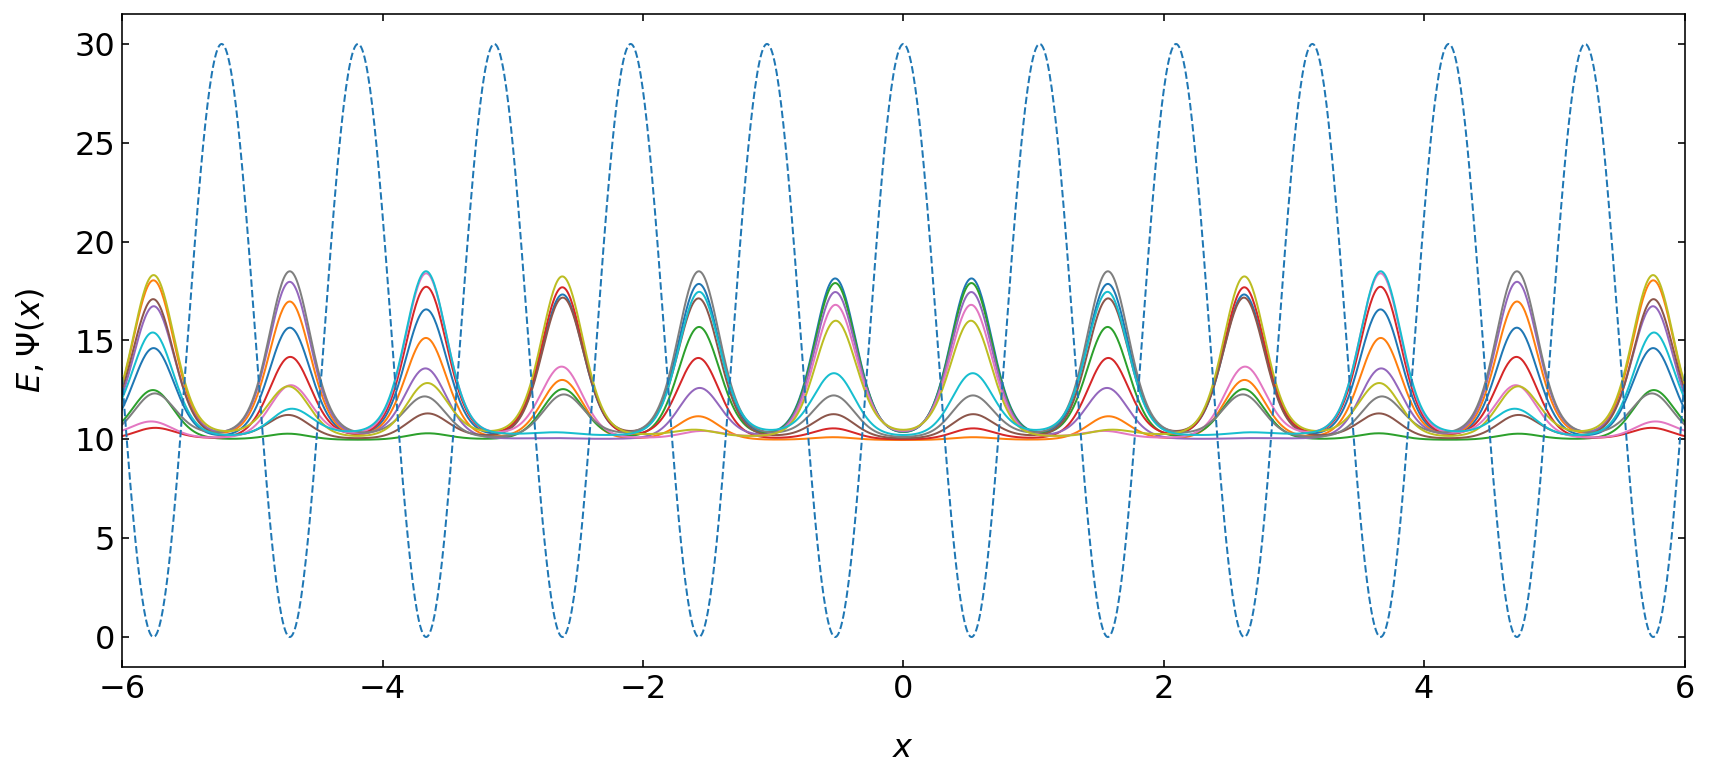

In [10]:
plt.figure(figsize=(14,6))

for k in range(n):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    #plt.axhline(y=vals[k])
    plt.plot(x, 5000*np.abs(vec)**2+vals[k], label=r"$n=%i$"%k)

    
plt.plot(x,U_vec,'--')
plt.xlabel(r"$x$")
plt.ylabel(r"$E, \Psi(x)$")
plt.xlim([-6,6])
plt.show()

In this case, it might be more instructive to look at individual wavefunctions, what are plotted below. It reveals that we have two effects. 

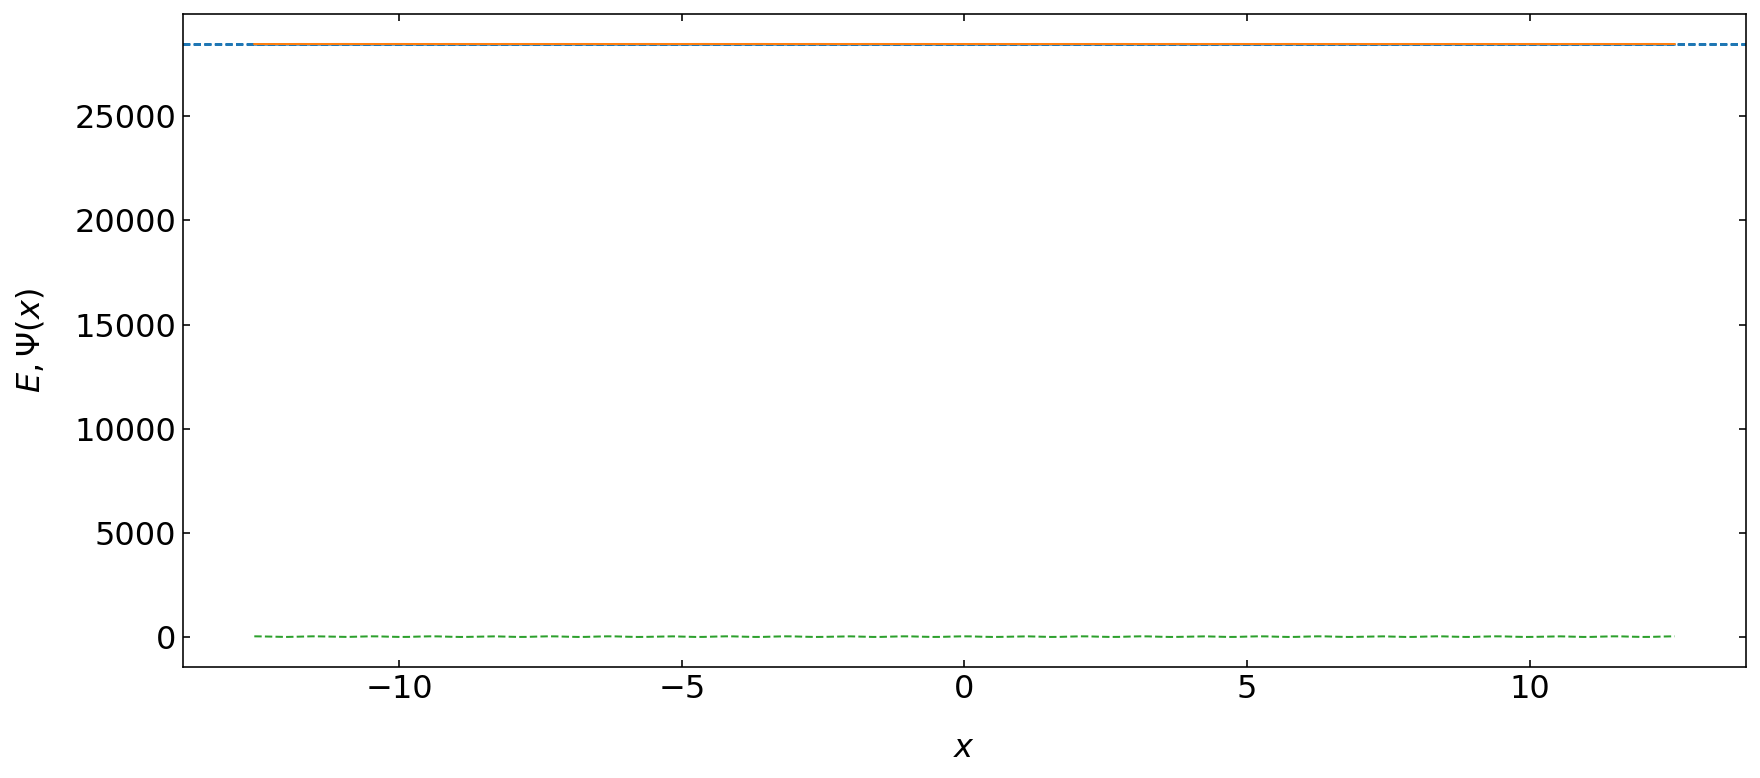

In [147]:
plt.figure(figsize=(14,6))

n=1

vec = vecs[:, n]
mag = np.sqrt(np.dot(vecs[:, n],vecs[:, n]))
vec = vec/mag
plt.axhline(y=vals[n],ls='--')
plt.plot(x, 5000*np.abs(vec)**2+vals[n])

n=25 

vec = vecs[:, n]
mag = np.sqrt(np.dot(vecs[:, n],vecs[:, n]))
vec = vec/mag
plt.axhline(y=vals[n],ls='--')
plt.plot(x, 5000*np.abs(vec)**2+vals[n])

    
plt.plot(x,U_vec,'--')
plt.xlabel(r"$x$")
plt.ylabel(r"$E, \Psi(x)$")
#plt.xlim([-6,6])
plt.show()

One effect comes from the finite size of the periodic structure. This creates an envelope which is similar to the shape of the wavefunction we had for the particle in a box. The second effect comes from the periodic structure itself, when the wavefunction is localized in the individual potential wells. The close spacing of the wells lets all wells interact with each other which creates energy bands.

## Energy states

If we plot the energy states as a function of the index of the energy state, we recognize a gap of energy states, which is not accessible by any state. These are the abdn gaps existing in periodic structures like that.

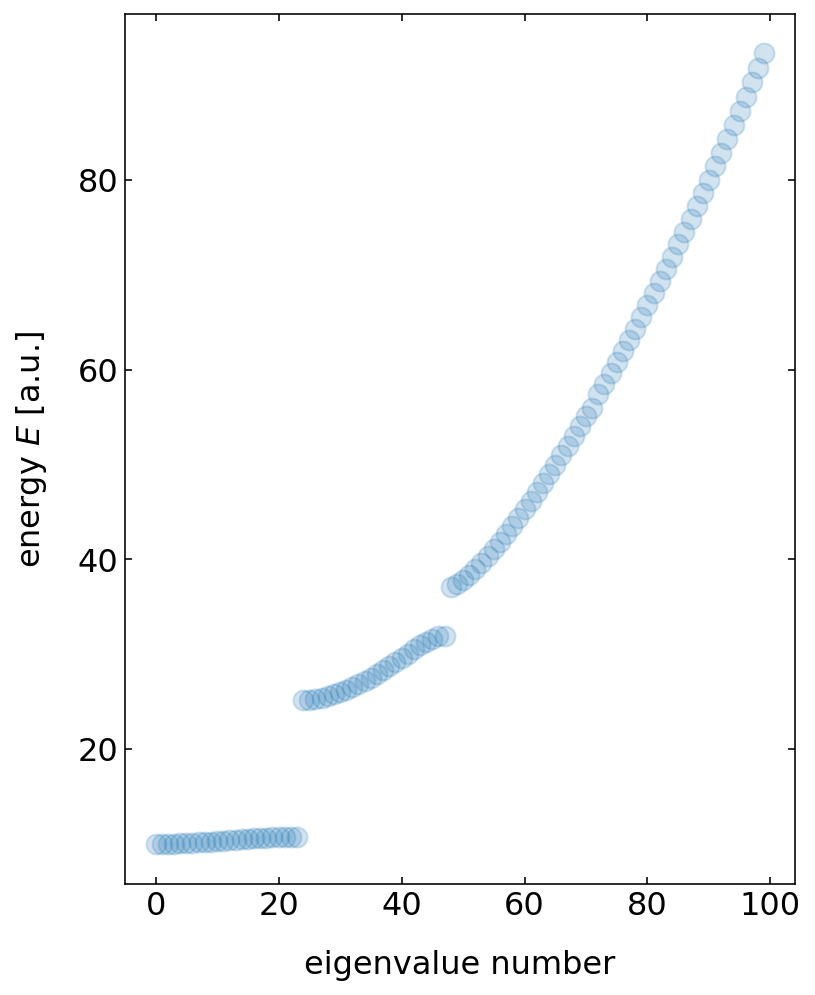

In [129]:
plt.figure(figsize=(6,8))
plt.xlabel('eigenvalue number')
plt.ylabel(r"energy $E$ [a.u.]")

plt.plot(vals,'o',alpha=0.2)

plt.show()

## Where to go from here?

To extend this model, you could try to find out how to remove the boundary effetcs. One may create perdiodic boundaries for this model. Research the web for that. 